### Content

* Model evaluation and Refinement
* Overfitting, Underfitting and Model Selection
* Ridge Regression
* Grid Search

### Model Evaluation and Refinement

#### The train_test_split fuction

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [3]:
list(y)

[0, 1, 2, 3, 4]

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [9]:
X_test

array([[2, 3],
       [8, 9]])

In [10]:
y_train

[2, 0, 3]

In [11]:
y_test

[1, 4]

#### Crossvalidation: cross_val_score() function

This function splits the dataset in cv folds. Each fold will be partitioned into training and testing datasets.Then this function returns the R² value for each fold. 

In [20]:
#Example from the oficial documentation

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=3)) # arguments: the fitting function used,  data (X,y) and the cv (number of folds) 


[0.33150734 0.08022311 0.03531764]


### The cros_val_predict Function

The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.

In [22]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, y, cv=3)

In [25]:
y_pred #There are three groups of different predicted data, as each one has a different 
#estimator. (due the different train set) 

array([174.26933996, 117.6539241 , 164.60228641, 155.65049088,
       132.68647979, 128.49511245, 120.76146877, 141.069413  ,
       164.18904498, 182.37394949, 111.04181265, 127.94311443,
       135.0869234 , 162.83066014, 135.3573514 , 157.64516523,
       178.95843326, 163.3919841 , 143.85237903, 144.29748882,
       133.58117218, 124.77928571, 132.90918003, 208.52927   ,
       153.61908967, 154.16616341, 118.95351821, 163.50467541,
       145.89406196, 168.3308101 , 155.87411031, 123.45960148,
       185.70459144, 133.38468582, 117.2789469 , 150.27895019,
       174.1541028 , 160.03235091, 192.31389633, 161.58568256,
       154.2224809 , 119.35517679, 146.15706413, 133.82056934,
       179.68118754, 137.96619936, 146.07788398, 126.77579723,
       123.32101099, 166.26710247, 146.41559964, 161.67261029,
       147.47731459, 138.44595305, 144.85421048, 113.77990664,
       185.54970402, 115.31624749, 142.23672103, 171.07792136,
       132.5394716 , 177.80524864, 116.5616502 , 134.25

### Overfitting, Underfitting and Model Selection

**Underfitting**: when a model cannot fit the points and the MSE error is too large, we have underfitting:
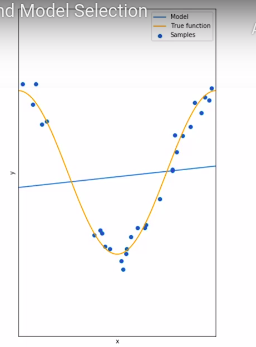


**Overfitting**: when the model is too flexible and it fits the noise instead of just the function:
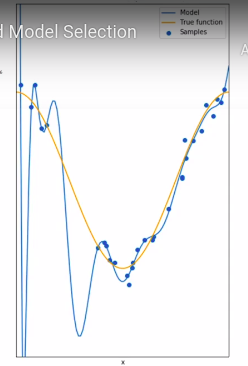
When we don't have training data, it's clearly that the model lost track of the function and oscillates.  

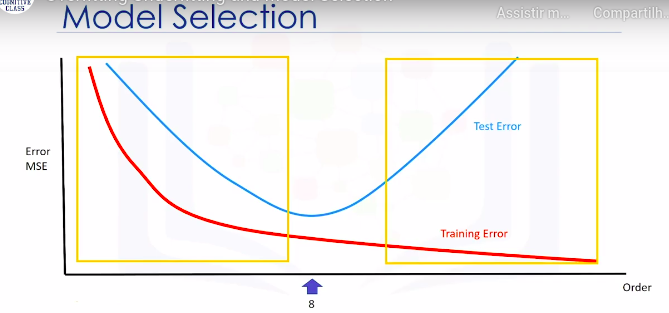

In this case, the best order for a polynomial would be 8, because this is the value that minimizes the MSE error in the test set. The yellow square on the left stands for underfitting while the right one stands for overfitting. 

### Ridge Regression

When doing a polinomyal regression, the coefficients of the higher order terms are usually great in magnitude. It implies in overfitting. To avoid that, the ridge regression provides the alpha parameter that adjust this coefficients to lower values in order to reduce the overfitting.  

To select the best alpha parameter, it's convenient to train some data with a alpha value, then perform a prediction using some new data (test data, i.e validation data). The R² is stored and more predicts are done with different values of alpha.  

### Grid Search

Grid Search allows us to perform a lot of tests to find out the model which maximize our R² value of minimizes the MSE error. The grod search provides a mean to combine all the hyperparameters of a model. 

In [32]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in v

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
clf.cv_results_

{'mean_fit_time': array([0.00109728, 0.00146143, 0.00084694, 0.0010132 ]),
 'std_fit_time': array([2.89576964e-04, 6.97645880e-05, 1.65230937e-05, 5.12713018e-04]),
 'mean_score_time': array([0.00060757, 0.00075936, 0.00075905, 0.00032242]),
 'std_score_time': array([7.87290094e-05, 1.49287477e-04, 2.33018870e-04, 7.55452969e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([1.        , 0.98039216, 1.        , 0.98039216]),
 'split1_test_score': array([0.96078431, 0.96078431, 0.92156863, 0.96078431]),
 'split2_test_score': array([0.97916667, 0.97916667, 1